In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_csv("C:\Vaibhav\IMARTICUS\Project\Diwali Sale\Diwali Sales Data.csv",encoding='unicode_escape')

In [3]:
sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Overall Data & Clean Data

In [4]:
sales.shape

(11251, 15)

In [5]:
sales.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
sales.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [8]:
sales.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


#### Deleting Unwanted Columns

In [9]:
sales.drop(columns=["Status", "unnamed1"], inplace=True)

In [10]:
sales.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [11]:
sales["Product_Category"].value_counts()

Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                      100
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

In [12]:
sales["Age Group"].value_counts()

26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: Age Group, dtype: int64

In [13]:
sales["Marital_Status"].value_counts()

0    6522
1    4729
Name: Marital_Status, dtype: int64

In [14]:
sales["State"].value_counts()

Uttar Pradesh       1946
Maharashtra         1526
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              429
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

In [15]:
sales["Zone"].value_counts()

Central     4296
Southern    2695
Western     1955
Northern    1491
Eastern      814
Name: Zone, dtype: int64

In [16]:
sales["Occupation"].value_counts()

IT Sector          1588
Healthcare         1408
Aviation           1310
Banking            1139
Govt                854
Hospitality         705
Media               637
Automobile          566
Chemical            542
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             350
Agriculture         283
Name: Occupation, dtype: int64

In [17]:
# sales.nunique()
sales.nunique()

User_ID             3755
Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
dtype: int64

In [18]:
# filling null values in 'Amount' column.
sales['Amount'].fillna(int(sales['Amount'].mean()), inplace=True)  

In [19]:
# Convert Float value into int.
sales['Amount']=sales['Amount'].astype('int')

In [20]:
sales.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [21]:
sales.duplicated().sum()

8

In [22]:
# this code shows all duplicate data in sales Data.
sales[sales.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304


In [23]:
sales.drop_duplicates(inplace=True)

In [24]:
sales.duplicated().sum()

0

# Visualization of Sales Data

### 1. Which Gender Purchase most of the product? 

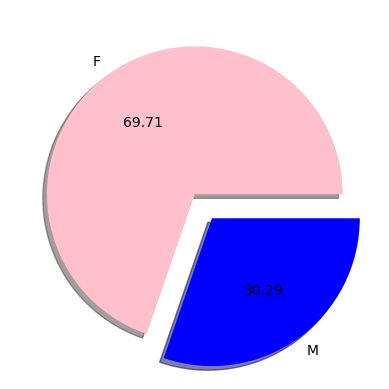

In [77]:
col=["pink","blue"]
sales.groupby('Gender').size().plot(kind='pie', autopct='%.2f',colors=col, shadow=True, labeldistance=1.1, 
         explode=[0,.2])
plt.show()

In [78]:
sales_gen=sales.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sales_gen

,Gender,Amount
0,F,74402209
1,M,31890052


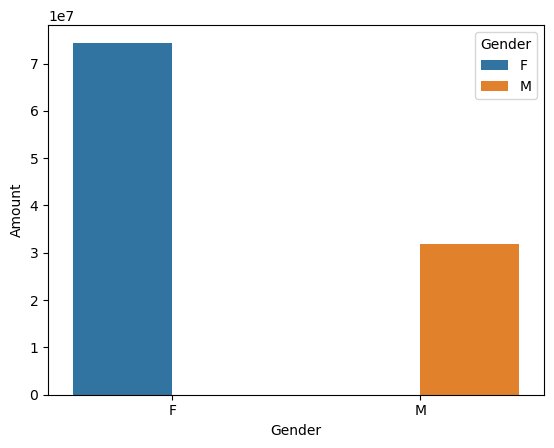

In [108]:
sales_gen=sales.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sales_gen
sns.barplot(x="Gender", y="Amount", data=sales_gen, hue="Gender")
plt.show()

### From above ghraphs we can see that most of the product purchase by Females as compare to Males.

### From which age group buy most of the product?

In [199]:
sales_age=sales.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sales_age

,Age Group,Amount
2,26-35,42600673
3,36-45,22163494
1,18-25,17235530
4,46-50,9245656
5,51-55,8256815
6,55+,4090440
0,0-17,2699653


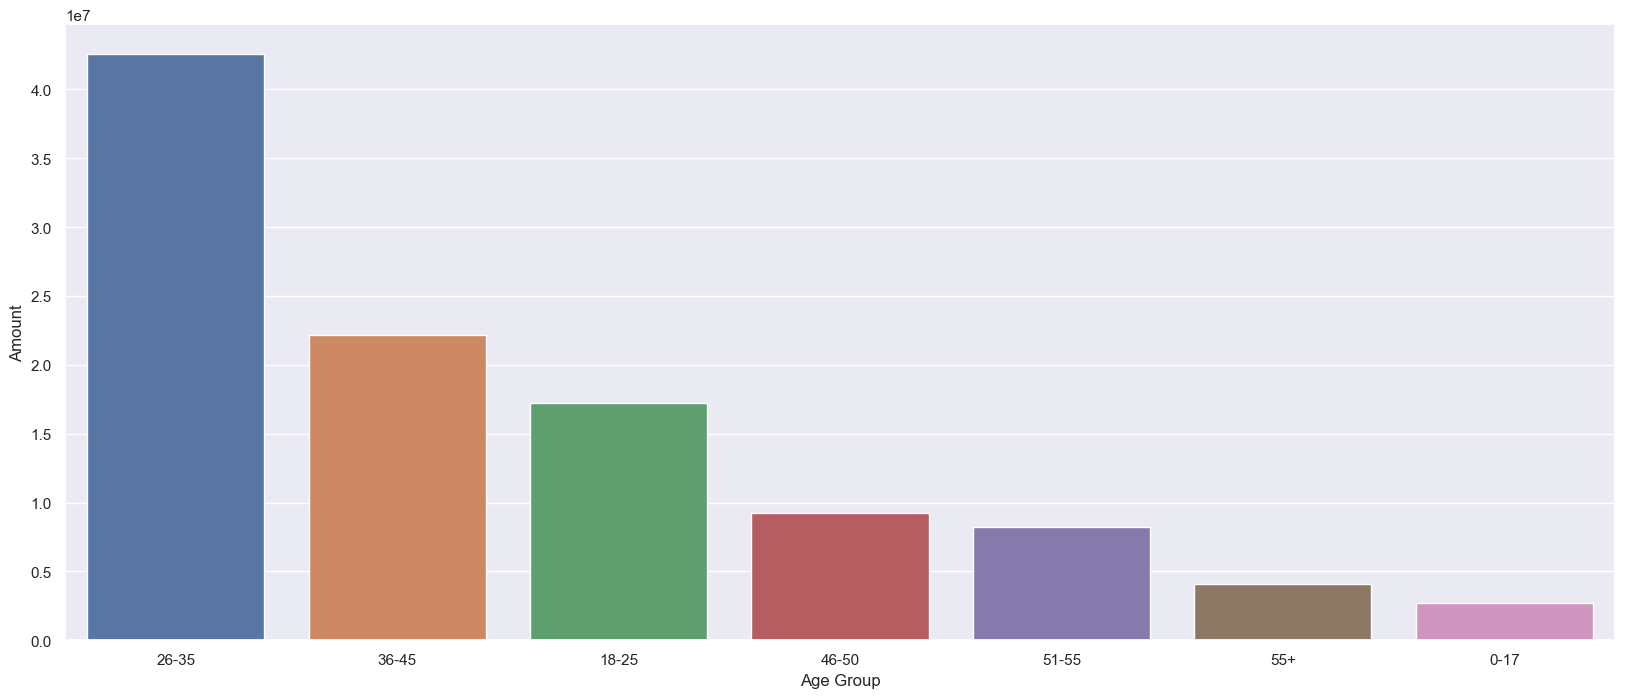

In [201]:
sales_age=sales.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sales_age
sns.barplot(x="Age Group", y="Amount", data=sales_age)
plt.show()

### Most of the product purchase by female and they are between 26-35.


### 2. Marital Status of buyers 

In [227]:
sales["Marital_Status"].value_counts(dropna=False)

0    6518
1    4725
Name: Marital_Status, dtype: int64

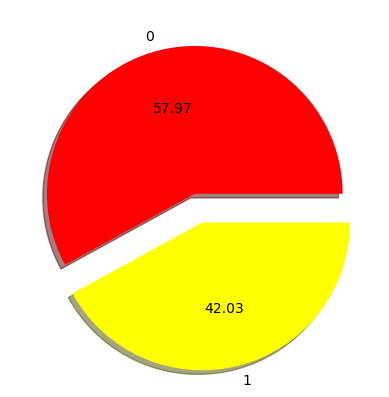

In [110]:
col=["Red","yellow"]
sales.groupby('Marital_Status').size().plot(kind='pie', autopct='%.2f',colors=col, shadow=True, labeldistance=1.1, 
         explode=[0,.2])
plt.show()

In [107]:
# sales_MS = sales["Marital_Status"].value_counts()
# sales_MS.plot(kind='bar')
# plt.show()

In [114]:
sales_MS=sales.groupby(['Marital_Status', 'Gender'], as_index=False)["Amount"].sum().sort_values(by="Amount", 
                                                                                                 ascending=False)
sales_MS

,Marital_Status,Gender,Amount
0,0,F,43806917
2,1,F,30595292
1,0,M,18329629
3,1,M,13560423


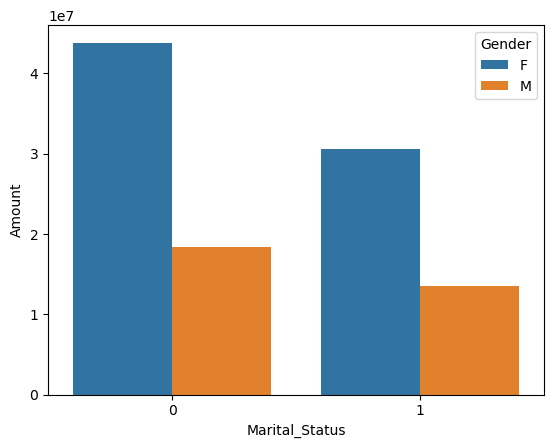

In [130]:
sales_MS=sales.groupby(['Marital_Status', 'Gender'], as_index=False)["Amount"].sum().sort_values(by="Amount", 
                                                                                                 ascending=False)
sales_MS
sns.barplot(x='Marital_Status', y='Amount', data=sales_MS, hue='Gender')
plt.show()

### 0-married, 1-unmarried

In [131]:
# gender_column = "Gender"
# sales.groupby(["Marital_Status", gender_column]).size().unstack(level=1).plot(kind='bar')

### From above ghraphs we can see that most of the product purchase byMarried women.

### 3.From which state do people buy the most?

In [136]:
sales["State"].value_counts(dropna=False)

Uttar Pradesh       1944
Maharashtra         1523
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              451
Bihar                433
Gujarat              428
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

In [171]:
sales_state=sales.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)
sales_state

,State,Orders
14,Uttar Pradesh,4809
10,Maharashtra,3799
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1106
3,Gujarat,1067


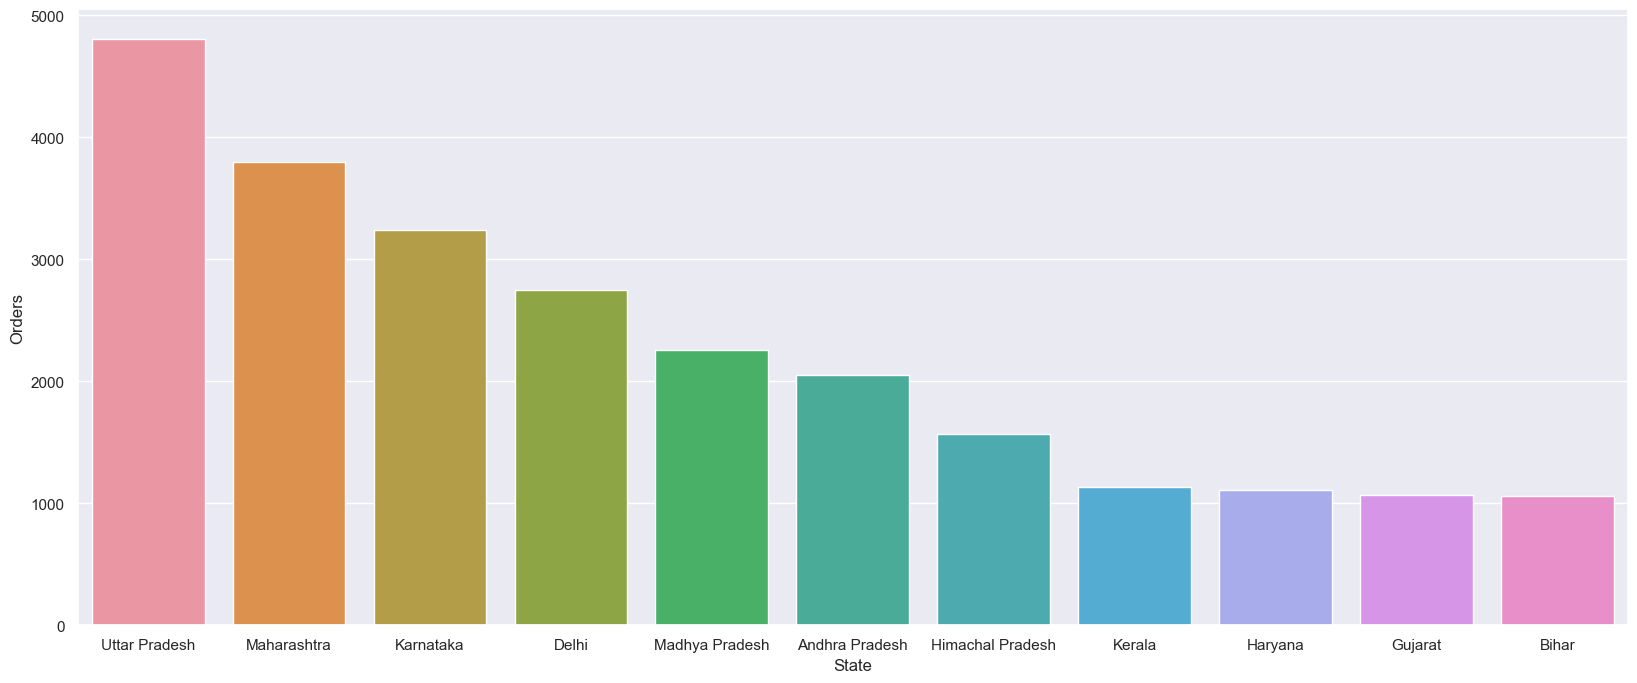

In [186]:
sales_state=sales.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(11)
sales_state
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x="State", y="Orders", data=sales_state)
plt.show()

In [173]:
# sales_state=sales.groupby([ "Zone"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)
# # sales_stat


In [174]:
# sales_state=sales.groupby(["Zone"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(11)
# sales_state
# sns.set(rc={'figure.figsize':(20,8)})
# # sns.brplot(x="Zone", y="Orders", data=sales_state)
# plt.show()

### From above ghraphs we can see that most of the order from UttarPradesh, Mahareshtra and Karnataka.

### 4. Occupation

In [196]:
sales_state=sales.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
cust_Occupation

,Occupation,User_ID,Age,Marital_Status,Orders,Amount
10,IT Sector,1590677451,56619,719,4002,14789127
8,Healthcare,1412271398,49532,394,3455,13034586
2,Aviation,1313027176,45981,582,3212,12599994
3,Banking,1142378814,40445,569,2819,10789516
7,Govt,856551738,30194,366,2155,8517212
9,Hospitality,704157615,25035,344,1738,6356539
12,Media,638867854,22753,292,1596,6295832
1,Automobile,567676498,20130,257,1373,5378049
11,Lawyer,532583013,18718,259,1344,4981665
4,Chemical,543626036,19130,241,1310,5306889


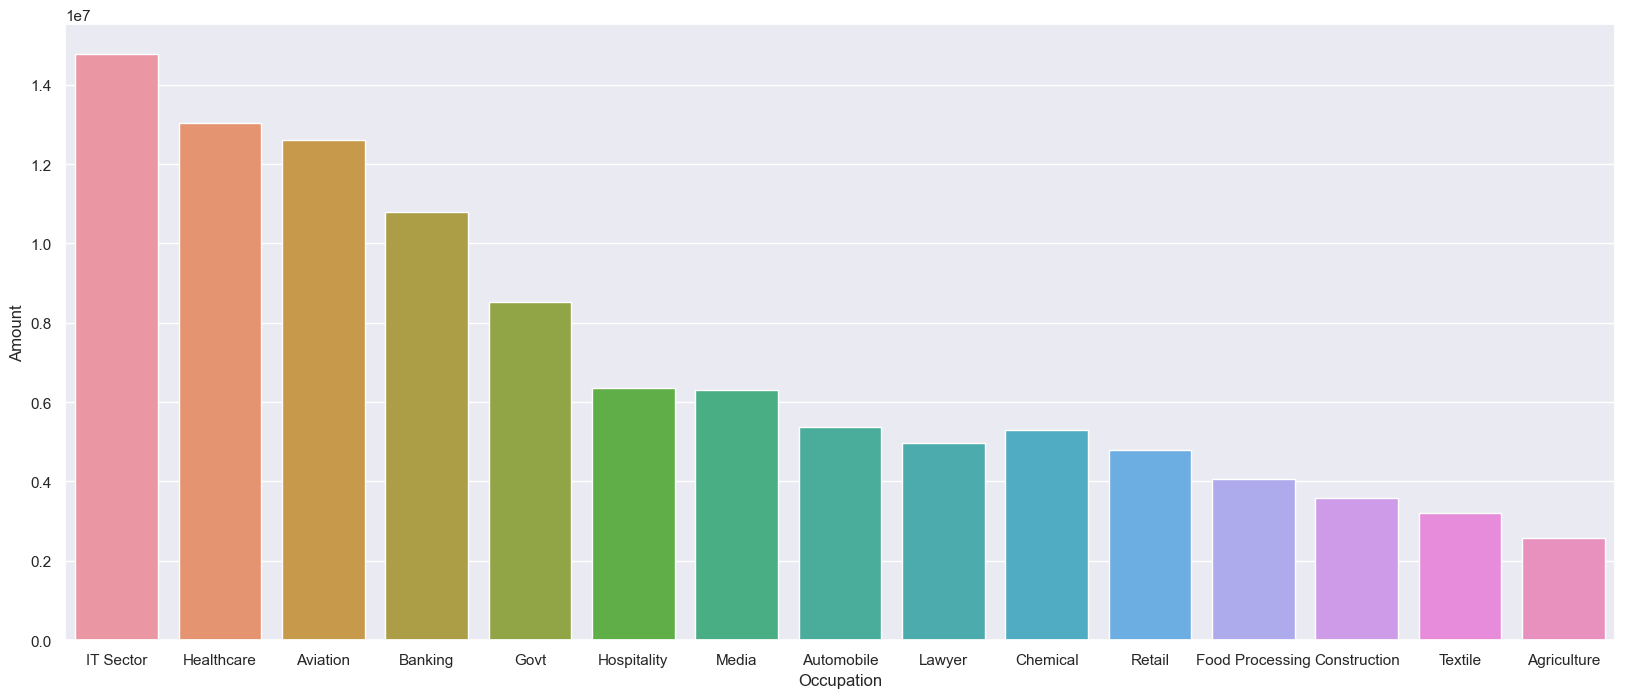

In [195]:
sales_state=sales.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
cust_Occupation
sns.barplot(x="Occupation", y="Amount", data=cust_Occupation)
plt.show()

### From above ghraphs we can see that most of the buyers from IT Sector, Healthcare and Aviation.

### 5.Which are the highest selling products?

In [205]:
sales_HSP=sales.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sales_HSP

,Product_Category,Amount
6,Food,33962242
3,Clothing & Apparel,16484472
7,Footwear & Shoes,15622474
5,Electronics & Gadgets,15607657
8,Furniture,5449504
9,Games & Toys,4331694
14,Sports Products,3635933
0,Auto,1963400
1,Beauty,1959484
15,Stationery,1676051


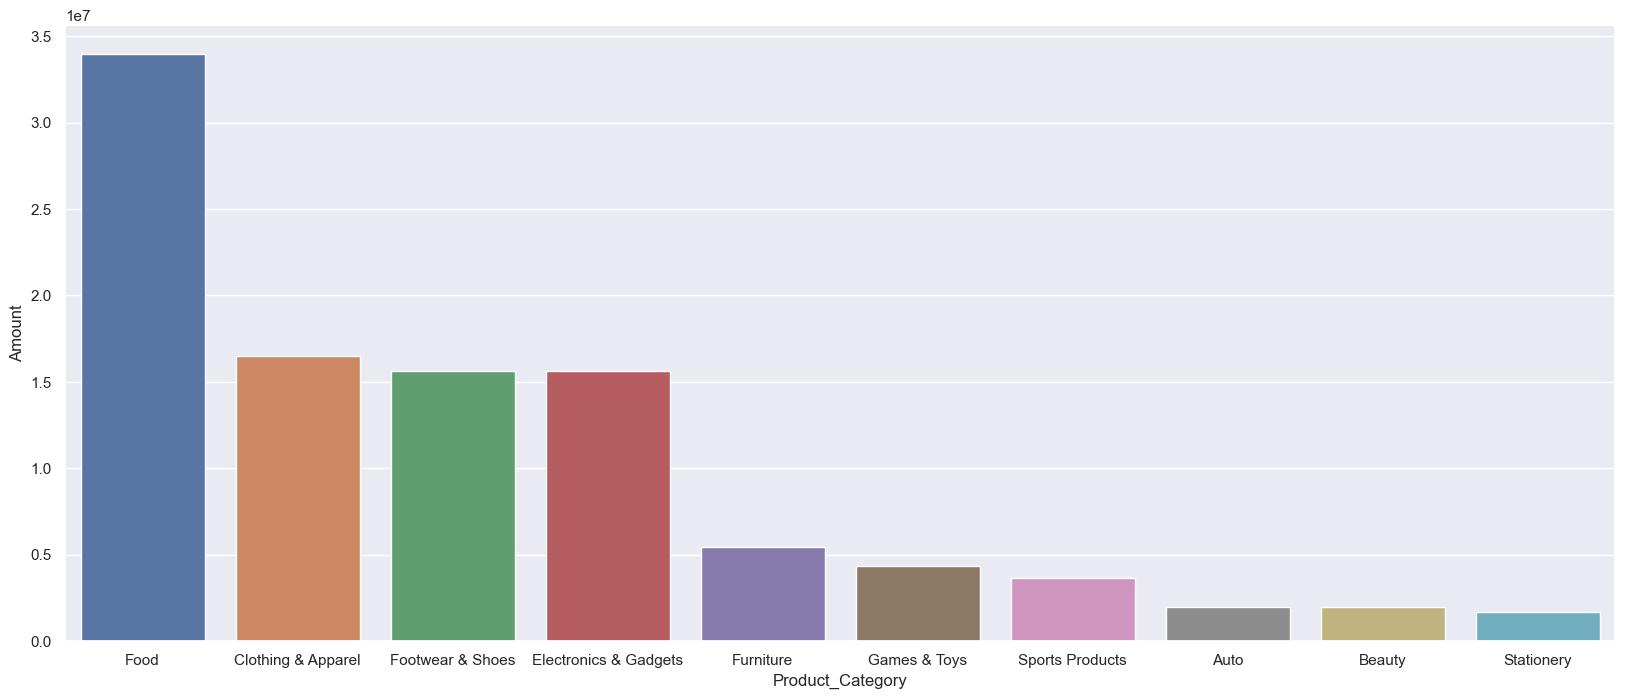

In [225]:
sales_HSP=sales.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sales_HSP
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x="Product_Category", y="Amount", data=sales_HSP)
plt.show()

### The highest selling products category are Food, clothing&apparel, footwear&shoes, Electronics&Gadgets and Furniture 

## RESULT

### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category